# Olympics-analysis

## Import libraries


In [12]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [13]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import tensorflow as tf
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Reading Datasets

### athletes_data

In [15]:
athletes_data = pd.read_csv('2025_Problem_C_Data\summerOly_athletes.csv')


athletes_data 


,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [16]:
athletes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    252565 non-null  object
 1   Sex     252565 non-null  object
 2   Team    252565 non-null  object
 3   NOC     252565 non-null  object
 4   Year    252565 non-null  int64 
 5   City    252565 non-null  object
 6   Sport   252565 non-null  object
 7   Event   252565 non-null  object
 8   Medal   252565 non-null  object
dtypes: int64(1), object(8)
memory usage: 17.3+ MB


In [17]:
athletes_data['Team'].value_counts()

Team
United States    16236
Great Britain    11390
France           11360
Italy             9185
Germany           8622
                 ...  
Formosa              1
Danzig               1
Salinero             1
Brynhild-2           1
Elvis Va             1
Name: count, Length: 1193, dtype: int64

In [18]:
athletes_data['Medal'].value_counts()

Medal
No medal    213747
Bronze       13070
Gold         13002
Silver       12746
Name: count, dtype: int64

### host_data

In [19]:
host_data = pd.read_csv('2025_Problem_C_Data\summerOly_hosts.csv')

host_data

,Year,Host
0,1896,"Athens, Greece"
1,1900,"Paris, France"
2,1904,"St. Louis, United States"
3,1908,"London, United Kingdom"
4,1912,"Stockholm, Sweden"
5,1916,Cancelled (WWI – Berlin had been awarded)
6,1920,"Antwerp, Belgium"
7,1924,"Paris, France"
8,1928,"Amsterdam, Netherlands"
9,1932,"Los Angeles, United States"


### medal_data

In [20]:
medal_data = pd.read_csv('2025_Problem_C_Data\summerOly_medal_counts.csv')

medal_data


,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896
...,...,...,...,...,...,...,...
1430,84,Qatar,0,0,1,1,2024
1431,84,Refugee Olympic Team,0,0,1,1,2024
1432,84,Singapore,0,0,1,1,2024
1433,84,Slovakia,0,0,1,1,2024


In [21]:
medal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    1435 non-null   int64 
 1   NOC     1435 non-null   object
 2   Gold    1435 non-null   int64 
 3   Silver  1435 non-null   int64 
 4   Bronze  1435 non-null   int64 
 5   Total   1435 non-null   int64 
 6   Year    1435 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 78.6+ KB


### programs_data

In [22]:
programs_data= pd.read_csv('2025_Problem_C_Data\summerOly_programs.csv', encoding='latin1')

programs_data


,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Skating,Figure,FSK,ISU,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Ice Hockey,Ice Hockey,IHO,IIHF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Total events,Total events,Total events,Total events,43,97,95,76,110,102,...,237,257,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0
72,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10,22,18,13,25,18,...,31,34,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0


## Exploratory Data Analysis

### atheletes.csv data explore


In [23]:
athletes_data

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [24]:
print(athletes_data["Medal"].unique())

print(athletes_data["Sport"].unique())

print(athletes_data["Team"].unique())


['No medal' 'Gold' 'Bronze' 'Silver']
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics' 'Cycling Road'
 'Artistic Gymnastics' 'Karate' 'Baseball/Softball'
 'Trampoline Gymnastics' 'Marathon Swimming' 'Canoe Slalom' 'Surfing'
 'Canoe Sprint' 'Cycling BMX Racing' 'Equestrian' 'Artistic Swimming'
 'Cycling Track' 'Skateboarding' 'Cycling Mountain Bike' '3x3 Basketball'
 'Cycling BMX Freestyle

In [25]:
# 性别分析

gender_unique_values = athletes_data.Sex.value_counts()
gender_unique_values

Sex
M    178544
F     74021
Name: count, dtype: int64

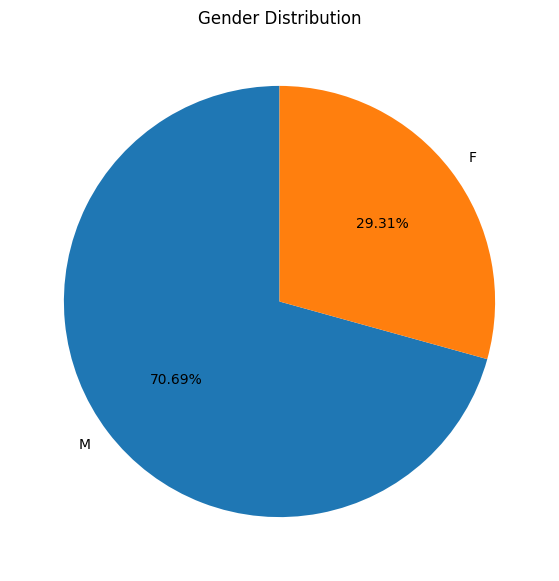

In [26]:
plt.figure(figsize=(15,7))
plt.title("Gender Distribution")
plt.pie(gender_unique_values, labels=gender_unique_values.index, autopct="%.2f%%", startangle=90)
plt.show()

In [27]:
# 国家参加人数分析
participants_counts  = athletes_data['NOC'].value_counts()

participants_counts

NOC
USA    16774
GBR    11998
FRA    11972
ITA     9351
GER     8866
       ...  
CRT       11
YMD        5
NBO        2
UNK        2
NFL        1
Name: count, Length: 234, dtype: int64

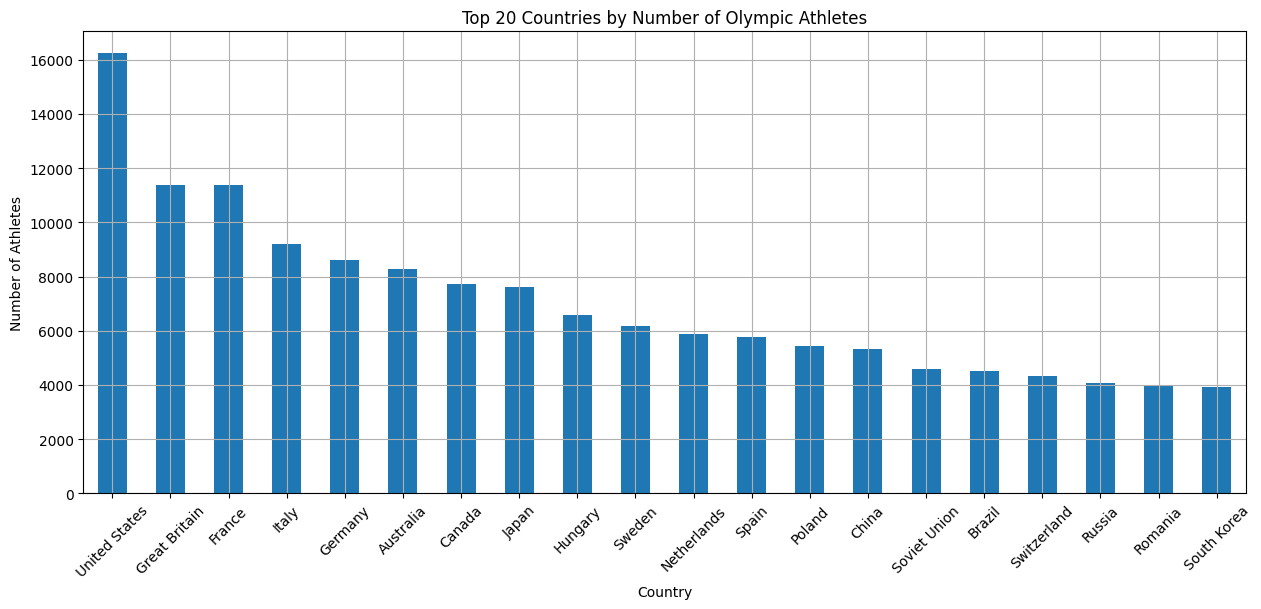

In [29]:
#国家历史参赛人数排名
plt.figure(figsize=(15, 6))
athletes_data['Team'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Countries by Number of Olympic Athletes')
plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

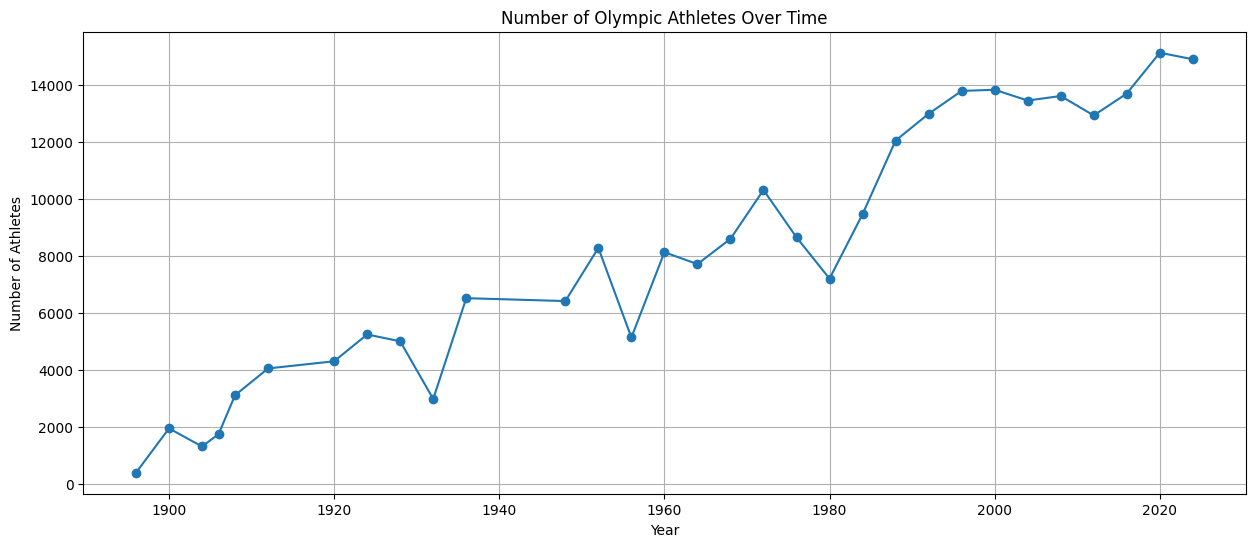

In [30]:
#国家历年参赛人数排名
yearly_counts = athletes_data['Year'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
yearly_counts.plot(kind='line', marker='o')
plt.title('Number of Olympic Athletes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.show()

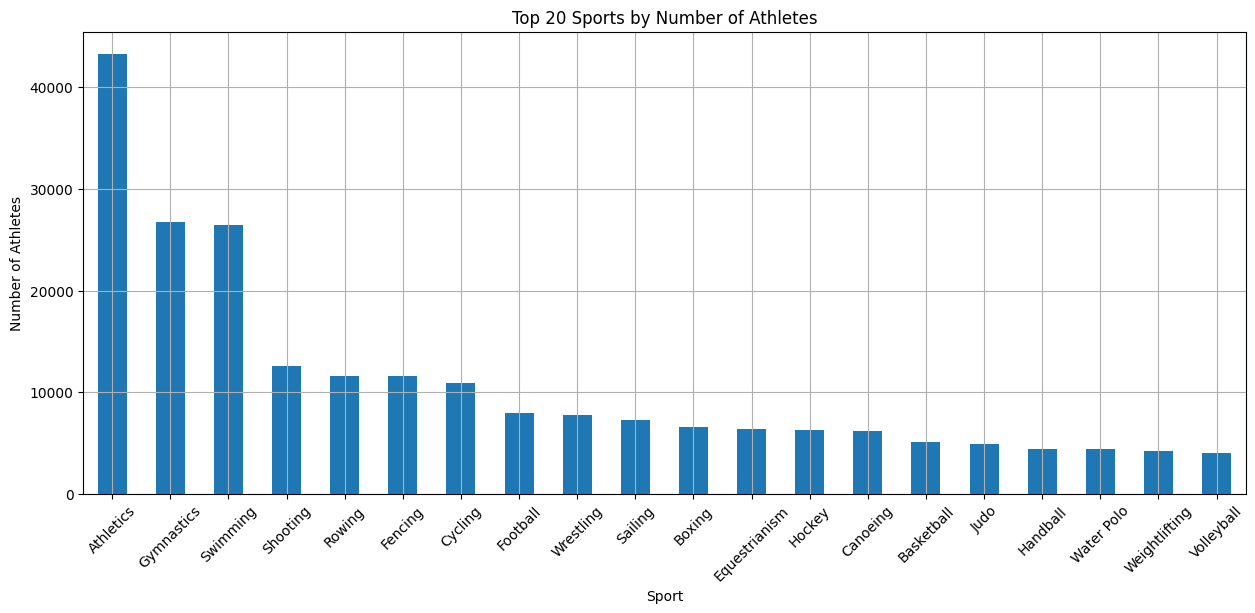

In [31]:
#项目参与人数排名
plt.figure(figsize=(15, 6))
athletes_data['Sport'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Sports by Number of Athletes')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

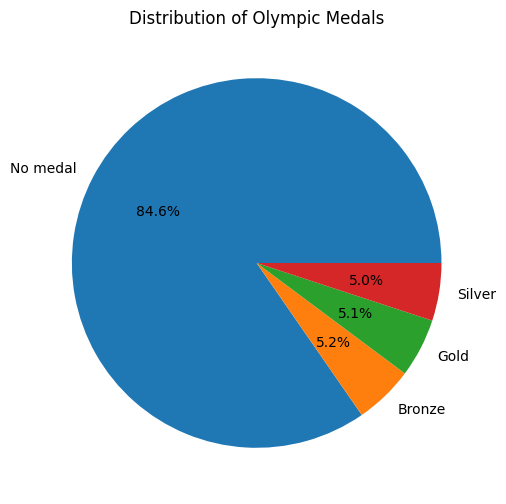

In [32]:
#获奖情况分析
plt.figure(figsize=(10, 6))
medal_dist = athletes_data['Medal'].value_counts()
plt.pie(medal_dist, labels=medal_dist.index, autopct='%1.1f%%')
plt.title('Distribution of Olympic Medals')
plt.show()

### medal_data data explore 

In [34]:
medal_data.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896


In [38]:
#添加奖牌和金牌百分比特征
# 1.计算每一年的金牌和奖牌总数
yearly_medals = medal_data.groupby('Year').agg({
    'Gold': 'sum',
    'Total': 'sum'
}).reset_index()

# 2. 将这些总数合并回原始数据框
medal_data = medal_data.merge(yearly_medals, on='Year', suffixes=('', '_total'))

# 3. 计算占比并添加新列
medal_data['Gold_Percentage'] = (medal_data['Gold'] / medal_data['Gold_total'] * 100).round(2)
medal_data['Total_Percentage'] = (medal_data['Total'] / medal_data['Total_total'] * 100).round(2)

# 4. 重命名列以避免混淆
medal_data = medal_data.rename(columns={
    'Gold_total': 'Year_Gold_Total',
    'Total_total': 'Year_Total_Medals'
})


In [44]:
#添加主办国特征


# 清理host数据
# 移除取消的奥运会
host_data = host_data[~host_data['Host'].str.contains('Cancelled', na=False)]

# 从Host列中提取国家名称
host_data['Host_Country'] = host_data['Host'].str.extract(r',\s*([^(]+)')
host_data['Host_Country'] = host_data['Host_Country'].str.strip()

# 处理一些特殊情况
host_data['Host_Country'] = host_data['Host_Country'].replace({
    'United Kingdom': 'Great Britain',
    'Soviet Union': 'Soviet Union',
    'West Germany': 'Germany'
})

# 2. 创建is_host列
medal_data['is_host'] = 0

# 3. 对每个主办年份和国家进行匹配
for _, host_row in host_data.iterrows():
    year = host_row['Year']
    country = host_row['Host_Country']
    # 设置对应的主办国标记为1
    mask = (medal_data['Year'] == year) & (medal_data['NOC'] == country)
    medal_data.loc[mask, 'is_host'] = 1



C:\Users\14479\AppData\Local\Temp\ipykernel_20792\260829327.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_data['Host_Country'] = host_data['Host'].str.extract(r',\s*([^(]+)')
C:\Users\14479\AppData\Local\Temp\ipykernel_20792\260829327.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_data['Host_Country'] = host_data['Host_Country'].str.strip()
C:\Users\14479\AppData\Local\Temp\ipykernel_20792\260829327.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [45]:
medal_data

,Rank,NOC,Gold,Silver,Bronze,Total,Year,Year_Gold_Total,Year_Total_Medals,Gold_Percentage,Total_Percentage,is_host
0,1,United States,11,7,2,20,1896,43,122,25.58,16.39,0
1,2,Greece,10,18,19,47,1896,43,122,23.26,38.52,1
2,3,Germany,6,5,2,13,1896,43,122,13.95,10.66,0
3,4,France,5,4,2,11,1896,43,122,11.63,9.02,0
4,5,Great Britain,2,3,2,7,1896,43,122,4.65,5.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,84,Qatar,0,0,1,1,2024,328,1039,0.00,0.10,0
1431,84,Refugee Olympic Team,0,0,1,1,2024,328,1039,0.00,0.10,0
1432,84,Singapore,0,0,1,1,2024,328,1039,0.00,0.10,0
1433,84,Slovakia,0,0,1,1,2024,328,1039,0.00,0.10,0


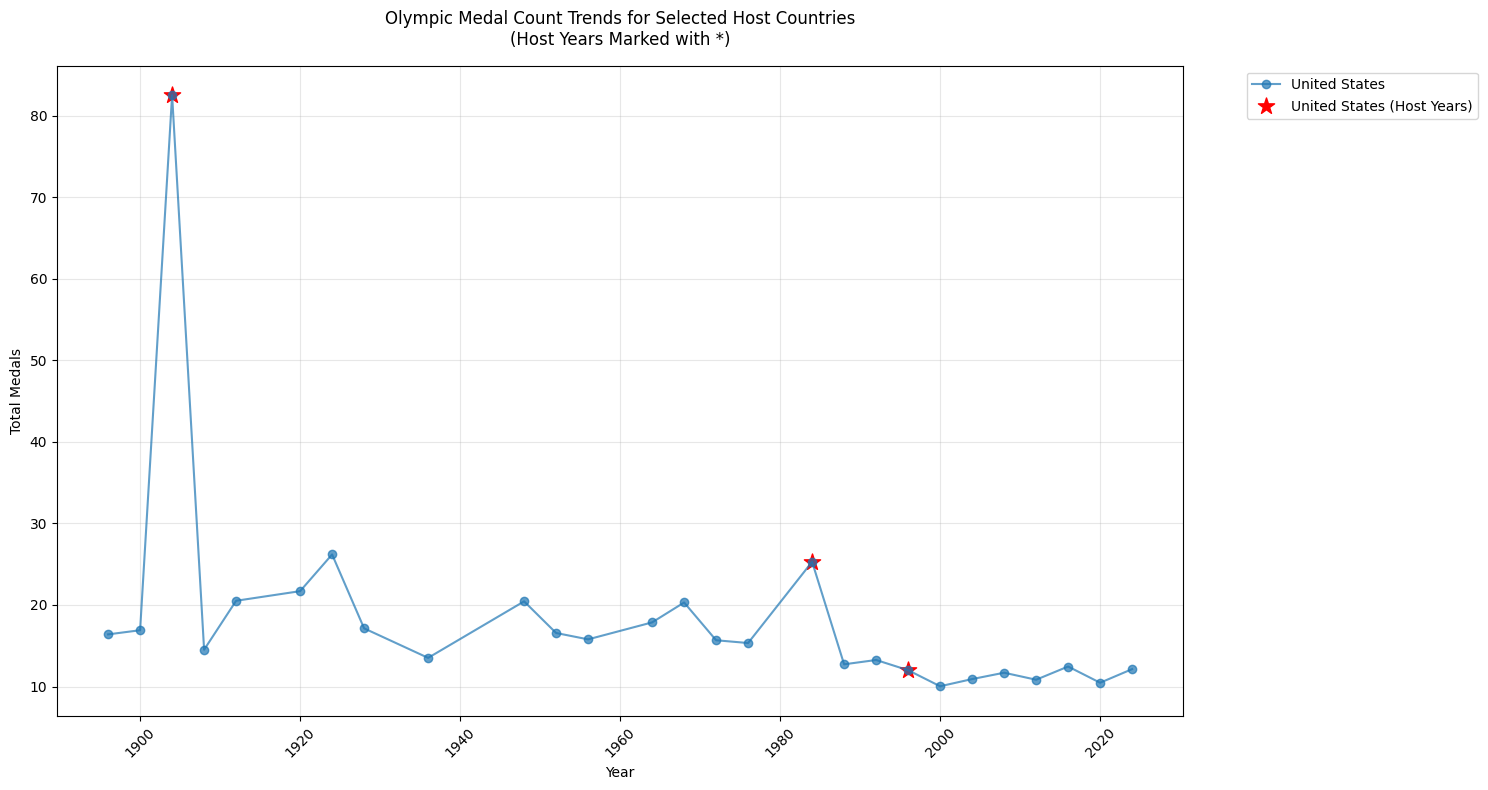

In [50]:
# 选择要分析的国家
selected_countries = []

# 创建图表
plt.figure(figsize=(15, 8))

# 为每个国家绘制折线
for country in selected_countries:
    # 获取该国家的数据
    country_data = medal_data[medal_data['NOC'] == country]
    
    # 绘制总奖牌数的变化
    plt.plot(country_data['Year'], country_data['Total_Percentage'], 
            label=country, marker='o', linestyle='-', alpha=0.7)
    
    # 特别标注主办年份的点
    host_years = country_data[country_data['is_host'] == 1]
    if not host_years.empty:
        plt.scatter(host_years['Year'], host_years['Total_Percentage'], 
                   s=150, marker='*', color='red',
                   label=f'{country} (Host Years)')

# 设置图表属性
plt.title('Olympic Medal Count Trends for Selected Host Countries\n(Host Years Marked with *)', 
         fontsize=12, pad=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Medals', fontsize=10)
plt.grid(True, alpha=0.3)

# 添加图例
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 旋转x轴标签
plt.xticks(rotation=45)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

### programs_data data explore

In [75]:
programs_data

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0.0,0.0,0.0,0,0,0.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0.0,0.0,2.0,1,2,4.0,...,4.0,4.0,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4.0,7.0,9.0,4,6,9.0,...,31.0,31.0,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0.0,1.0,1.0,0,1,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Skating,Figure,FSK,ISU,0.0,0.0,0.0,0,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Ice Hockey,Ice Hockey,IHO,IIHF,0.0,0.0,0.0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Total events,Total events,Total events,Total events,43.0,97.0,95.0,76,110,102.0,...,237.0,257.0,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0
72,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10.0,22.0,18.0,13,25,18.0,...,31.0,34.0,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0


In [63]:
#  获取年份列（排除非数字列）
year_columns = [col for col in programs_data.columns if str(col).isdigit()]

#  按Sport分组计算每年的项目数量
sport_evolution = programs_data.groupby('Sport')[year_columns].sum()

# 加sum列
sport_evolution['sum'] = sport_evolution[year_columns].sum(axis=1)

sport_evolution


,1896,1900,1904,1908,1912,1920,1924,1928,1932,1936,...,1992,1996,2000,2004,2008,2012,2016,2020,2024,sum
Sport,,,,,,,,,,,,,,,,,,,,,
Aquatics,4.0,8.0,12.0,9,14.0,16,17.0,16.0,16.0,16.0,...,38.0,38.0,44.0,44.0,46.0,46.0,46.0,49.0,49.0,825.0
Archery,0.0,7.0,6.0,3,0.0,10,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,76.0
Athletics,12.0,23.0,25.0,26,30.0,29,27.0,27.0,29.0,29.0,...,43.0,44.0,46.0,46.0,47.0,47.0,47.0,48.0,48.0,1074.0
Badminton,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,44.0
Baseball and Softball,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,1.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,11.0
Basketball,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,38.0
Basque Pelota,0.0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Boxing,0.0,0.0,7.0,5,0.0,8,8.0,8.0,8.0,8.0,...,12.0,12.0,12.0,11.0,11.0,13.0,13.0,13.0,13.0,278.0
Breaking,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


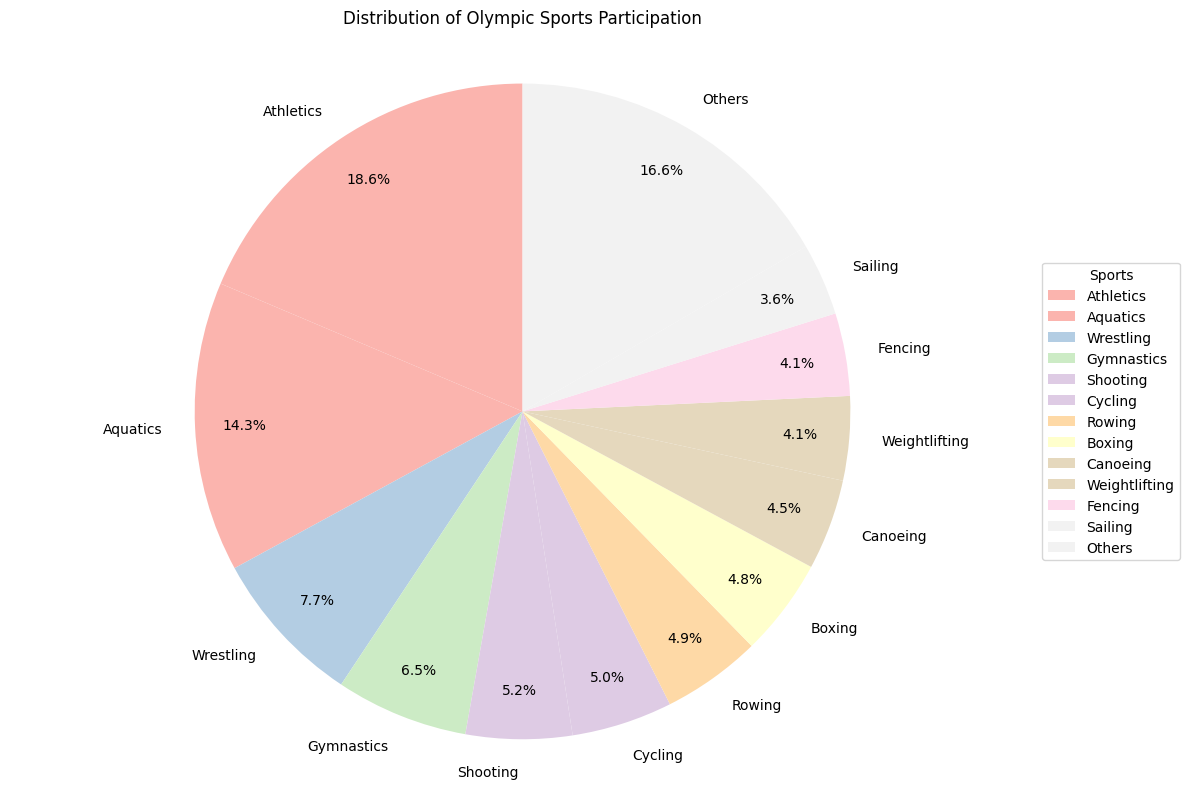


Detailed Statistics:
Number of major sports shown: 12
Number of sports in 'Others' category: 36

Sports in 'Others' category:
['Judo', 'Equestrian', 'Tennis', 'Archery', 'Taekwondo', 'Volleyball', 'Modern Pentathlon', 'Badminton', 'Table Tennis', 'Basketball', 'Field hockey', 'Football', 'Handball', 'Triathlon', 'Baseball\xa0and Softball', 'Golf', 'Rugby', 'Skateboarding', 'Karate', 'Skating', 'Sport Climbing', 'Tug of War', 'Polo', 'Surfing', 'Water Motorsports', 'Croquet', 'Breaking', 'Rackets', 'Lacrosse', 'Basque Pelota', 'Cricket', 'Ice Hockey', 'Jeu de Paume', 'Roque', 'Flag football', 'Squash']


In [73]:
# 删除汇总行
sport_evolution = sport_evolution[~sport_evolution.index.isin(['Total disciplines', 'Total events', 'Total sports'])]

# 按sum值排序
sorted_sports = sport_evolution.sort_values('sum', ascending=False)

# 设置阈值（这里以前25%的项目为例，你可以调整这个阈值）
threshold = sorted_sports['sum'].quantile(0.75)

# 分类
major_sports = sorted_sports[sorted_sports['sum'] >= threshold]
other_sports = sorted_sports[sorted_sports['sum'] < threshold]

# 准备饼图数据
sizes = list(major_sports['sum']) + [other_sports['sum'].sum()]
labels = list(major_sports.index) + ['Others']

# 创建饼图
plt.figure(figsize=(12, 8))
colors = plt.cm.Pastel1(np.linspace(0, 1, len(sizes)))  # 使用颜色映射生成颜色

plt.pie(sizes, 
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',  # 显示百分比
        pctdistance=0.85,   # 百分比标签的位置
        startangle=90)      # 起始角度

plt.title('Distribution of Olympic Sports Participation', pad=20)
plt.axis('equal')

# 添加图例
plt.legend(labels, 
          loc="center left", 
          bbox_to_anchor=(1, 0.5),
          title="Sports")

plt.tight_layout()
plt.show()

# 打印统计信息
print(f"\nDetailed Statistics:")
print(f"Number of major sports shown: {len(major_sports)}")
print(f"Number of sports in 'Others' category: {len(other_sports)}")
print("\nSports in 'Others' category:")
print(other_sports.index.tolist())

## Data Cleaning

### athletes_data

In [74]:
athletes_data

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze
